In [ ]:
!pip install keras_cv
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt


In [ ]:
!pip install keras-cv transformers pillow matplotlib


In [ ]:
from keras_cv.models import StableDiffusion

# Load the Stable Diffusion model
model = StableDiffusion(img_width=512, img_height=512)


By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [ ]:
from keras_cv.models import StableDiffusion
import matplotlib.pyplot as plt

# Load Stable Diffusion model
model = StableDiffusion(img_width=512, img_height=512)

# Generate images
prompt = "photograph of an astronaut riding a horse"
images = model.text_to_image(prompt, batch_size=1)

# Plot images
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i].astype("uint8"))
        plt.axis("off")
    plt.show()

plot_images(images)


By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:1383: UserWarning: Layer 'clip_encoder_layer_6' looks like it has unbuilt state, but Keras is not able to trace the layer `call()` in order to build it automatically. Possible causes:
1. The `call()` method of your layer may be crashing. Try to `__call__()` the layer eagerly on some test input first to see if it works. E.g. `x = np.random.random((3, 4)); y = layer(x)`
2. If the `call()` method is correct, then you may need to implement the `def build(self, input_shape)` method on your layer. It should create all variables used by the layer (e.g. by calling `layer.build()` on all its children layers).
Exception encountered: ''Exception encountered when calling CLIPAttention.call().

pred must not be a Python bool

Arguments received by CLIPAttention.call():
  • inputs=tf.Tensor(shape=(None, 77, 768), dtype=float32)
  • attention_mask=None''
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py

TypeError: Exception encountered when calling CLIPEncoderLayer.call().

[1mCould not automatically infer the output shape / dtype of 'clip_encoder_layer_6' (of type CLIPEncoderLayer). Either the `CLIPEncoderLayer.call()` method is incorrect, or you need to implement the `CLIPEncoderLayer.compute_output_spec() / compute_output_shape()` method. Error encountered:

Exception encountered when calling CLIPAttention.call().

[1mpred must not be a Python bool[0m

Arguments received by CLIPAttention.call():
  • inputs=tf.Tensor(shape=(None, 77, 768), dtype=float32)
  • attention_mask=None[0m

Arguments received by CLIPEncoderLayer.call():
  • args=('<KerasTensor shape=(None, 77, 768), dtype=float32, sparse=False, name=keras_tensor_13>',)
  • kwargs=<class 'inspect._empty'>

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

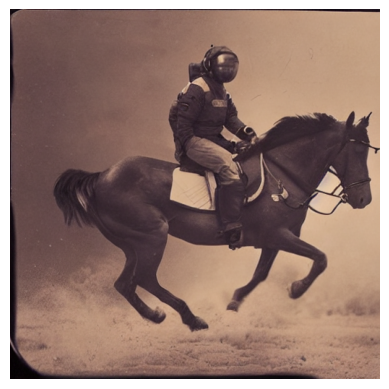

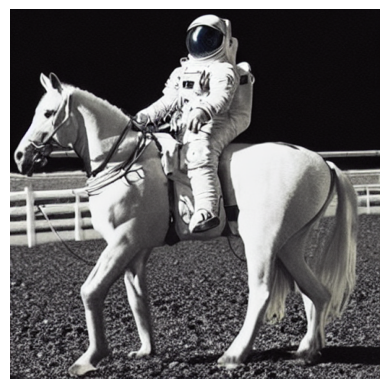

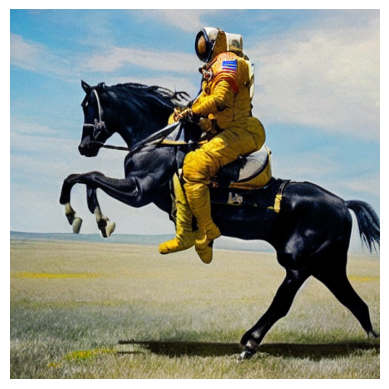

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

prompt = "photograph of an astronaut riding a horse"
images = pipe(prompt, num_images_per_prompt=3).images

# Display images
for img in images:
    plt.imshow(img)
    plt.axis("off")
    plt.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Diffusers model: 74.40 seconds


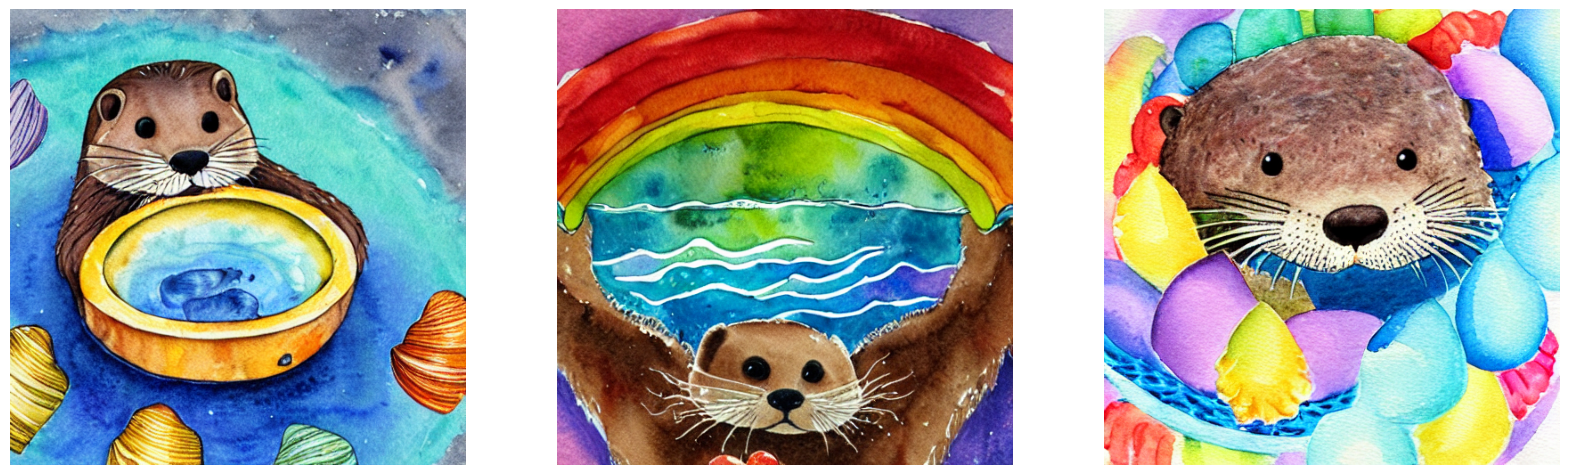

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import time
import matplotlib.pyplot as plt

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available

# Benchmark and generate images
benchmark_result = []
start = time.time()
prompt = "A cute otter in a rainbow whirlpool holding shells, watercolor"
results = pipe(prompt, num_images_per_prompt=3)
end = time.time()

# Add benchmark result
benchmark_result.append(["Diffusers", end - start])
print(f"Diffusers model: {(end - start):.2f} seconds")

# Extract and display images
images = results.images

def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()

plot_images(images)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

XLA + mixed precision: 29.42 seconds


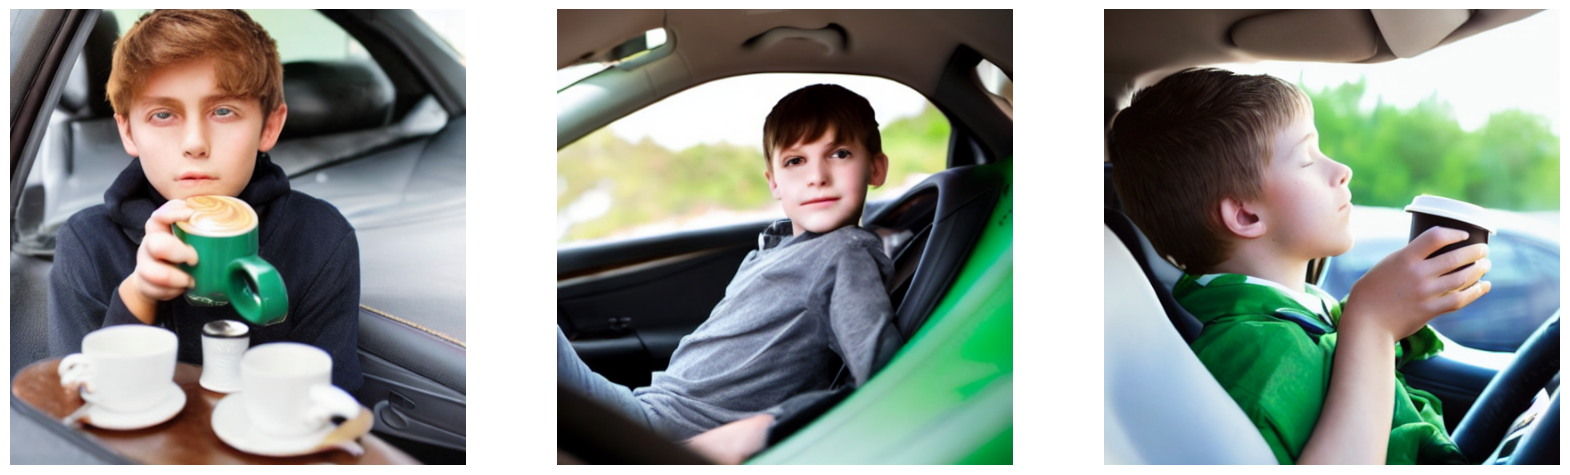

In [ ]:
from diffusers import StableDiffusionPipeline
import torch
import time
import matplotlib.pyplot as plt

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = pipe.to(device)

# Enable mixed precision for GPUs with Tensor Cores
if device == "cuda":
    pipe.enable_attention_slicing()  # Optimize memory usage
    # pipe.enable_xformers_memory_efficient_attention()  # Optimize attention mechanism
    pipe.enable_vae_slicing()  # Optimize VAE memory usage
    pipe.to(torch.float16)  # Ensure all tensors are in float16 for mixed precision

# Benchmark and generate images
benchmark_result = []
start = time.time()
prompt = (
    "Boy having coffee in the car with having beutiful green eyes"
)
results = pipe(prompt, num_images_per_prompt=3)
end = time.time()

# Add benchmark result
benchmark_result.append(["XLA + Mixed Precision (Diffusers)", end - start])
print(f"XLA + mixed precision: {(end - start):.2f} seconds")

# Extract and display images
images = results.images

def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.show()

plot_images(images)
